In [1]:
#This code has the following purpose:
#To check how good the data processing in no Lyman limit systems los are
#Instead of using the los from the 40 box, I am going to use quasar los data, and measure without LLS.
#The code will take out the LLS, using the clipping method.
#The clipping method: meaning that when the code detects hydrogen netural fraction >0.001, and when the column density of the detected system is between 1.6 e17, 2e20, the code removes the system.


#We want to id the los, id how many systems detected, id the detected system.
#we want the code to switch between random and start from beginning. 
#We want the code to swtich from counting LLS or not.

In [2]:
from scipy import integrate
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
import scipy.interpolate
import re
import pickle as pickle

In [3]:
# def main():
#     location = True
#     if location == True:
#         '''start from the input location'''
#         if count_LLS == True:
        
#         else:
#     if location == False:
#         '''start from the beginning of the los'''
#         if count_LLS == True:

#         else:

In [4]:
def clipping_LLS(gas_density,HI_density,distance):
    '''this function removes LLS along the LOS, it checks the threshold first'''
    list_gas = gas_density.tolist()
    list_HI = HI_density.tolist()
    list_d = distance.tolist()
    '''change this if it's used on cMpc vs pMpc'''
    distance_cm = distance *0.1453*3.086e24 /0.68
    counts = 0
    counts_list = []
    end_list = []
    column_density_list = []
    LLS_counts = 0
    '''check how many needs to be moved'''

    '''this part of the function checks the LLS, and id it'''
    '''use index so it carries when it goes through LLS'''
    i = 0
    while i < len(HI_density):
        '''check when it reach the threshold, count is how many there are, end is the end of the string that is removed'''
        if(HI_density[i]/gas_density[i]>0.001):

            '''this is the condition check for the threshold'''
            HI_graph = []
            distance_graph = []
            y_int = []
            while(HI_density[i]/gas_density[i] >0.001):
                HI_graph.append(HI_density[i])
                distance_graph.append(distance_cm[i])
                y_int = integrate.cumtrapz(HI_graph,distance_graph,initial = 0)
                counts+=1
                i+=1
                LLS_counts +=1
            '''check the column density'''
            if(y_int[-1] >= (1.6e17) and y_int[-1] <= 2e20):
                counts_list.append(counts)
                end_list.append(i)
                column_density_list.append(y_int[-1])
        else:
            i+=1

    "this code removes the string id'ed, idk how it works, I wrote it" 
    for z,p in zip(counts_list, end_list):
        for i in range(p-z,p):
            # list_gas[i:] = list_gas[(i+1):]
            # list_HI[i:] = list_HI[(i+1):]
            difference = list_d[i] - list_d[i-1]
            list_d[i:] = np.subtract(list_d[(i+1):],difference)
        for i in range(z):
            list_gas.pop(p-z)
            list_HI.pop(p-z)
            # list_d.pop(p-z)

    return list_gas,list_HI,list_d,column_density_list


def distance_remove():
    '''here should be the input function'''
    

In [5]:
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]

    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

'''below tests the removing LLS function'''
raw_path = "/mnt/c/Users/jiawen/desktop/mfp_code/MFP/Box_data/LOS/40_box/MFP_0.1453/los.00005.raw"
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)

In [6]:
HI_density[2164]

2.99e-09

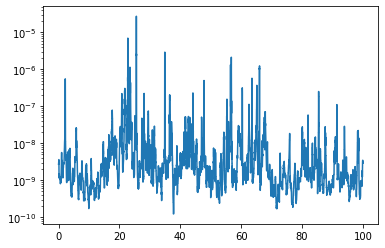

In [8]:
plt.plot(distance,HI_density)
plt.yscale("log")

In [9]:
list_gas,list_HI,list_d,list_density = clipping_LLS(gas_density,HI_density,distance)

In [10]:
list_density 

[3.501101903612829e+17]

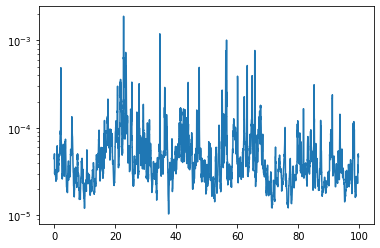

In [11]:
plt.plot(list_d,np.divide(list_HI,list_gas))
plt.yscale("log")

In [12]:
def counting_LLS_and_ID():
    

SyntaxError: unexpected EOF while parsing (4194739117.py, line 2)